# Predicting Heart Disease using Machine Learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting, whether or not, someone has heart disease or not based on their medical attributes. 

We are going to take the following approach:

1. Problem definition 
2. Data
3. Evaulation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

## 3.Evaluation

> If we can reach 95% accuracy on predicting whether or not a patient has heart disease during the proof of concept, we will pursure the project.

## 4.Features
This is where you will get information about each of the features in our data.

**Create Data Dictionary**
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
         Value 0: typical angina
         Value 1: atypical angina
         Value 2: non-anginal pain
         Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
         Value 1: upsloping
         Value 2: flat
         Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We are going to use Pandas, Numpy and Matplotlib for data analysis and manipulation

In [1]:
#Regular EDA and plotting libraries
import pandas as pd    # np is short for numpy
import numpy as np   # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (exploratory data analysis or EDA)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Let's find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

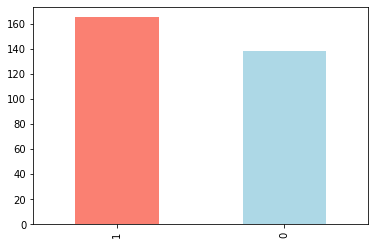

In [6]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to Sex

In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


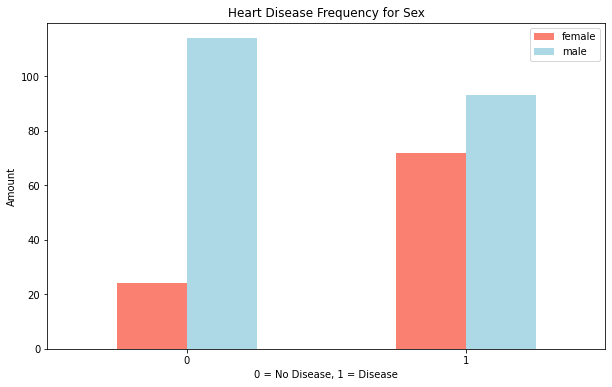

In [20]:
#Create a plot pf crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize = (10,6),color = ["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease") 
plt.ylabel("Amount")
plt.legend(["female","male"]);

plt.xticks(rotation = 0);

### Age vs Max Heart Rate for Heart Disease

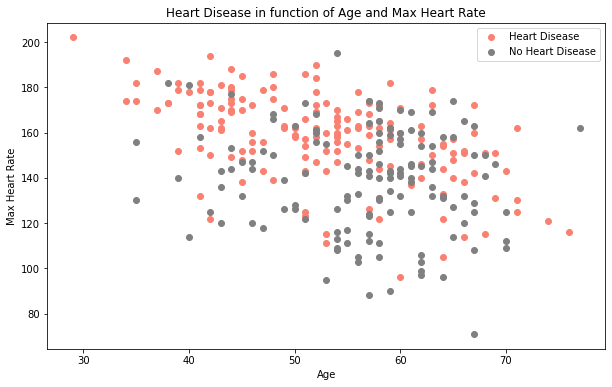

In [38]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive example
plt.scatter(df["age"][df["target"]==1],
           df["thalach"][df["target"]==1],
           c = "salmon");

#Scatter with negative examples 
plt.scatter(df["age"][df["target"]==0],
           df["thalach"][df["target"]==0],
           c = "grey");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age") 
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No Heart Disease"]);

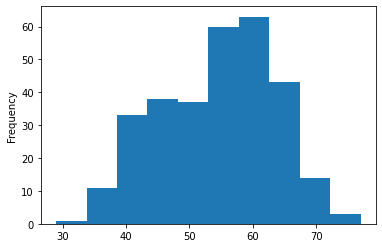

In [39]:
#Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

* cp: chest pain type
          Value 0: typical angina
          Value 1: atypical angina
          Value 2: non-anginal pain
          Value 3: asymptomatic

In [40]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


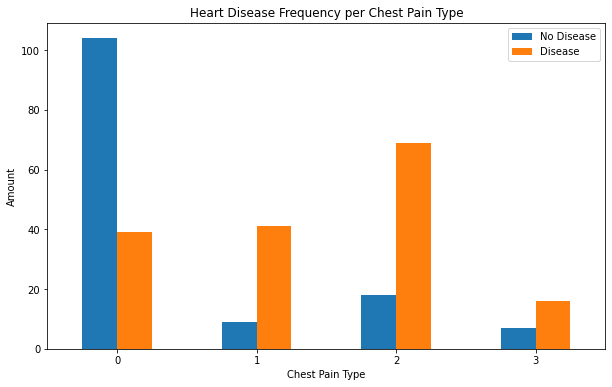

In [42]:
#Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6))

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


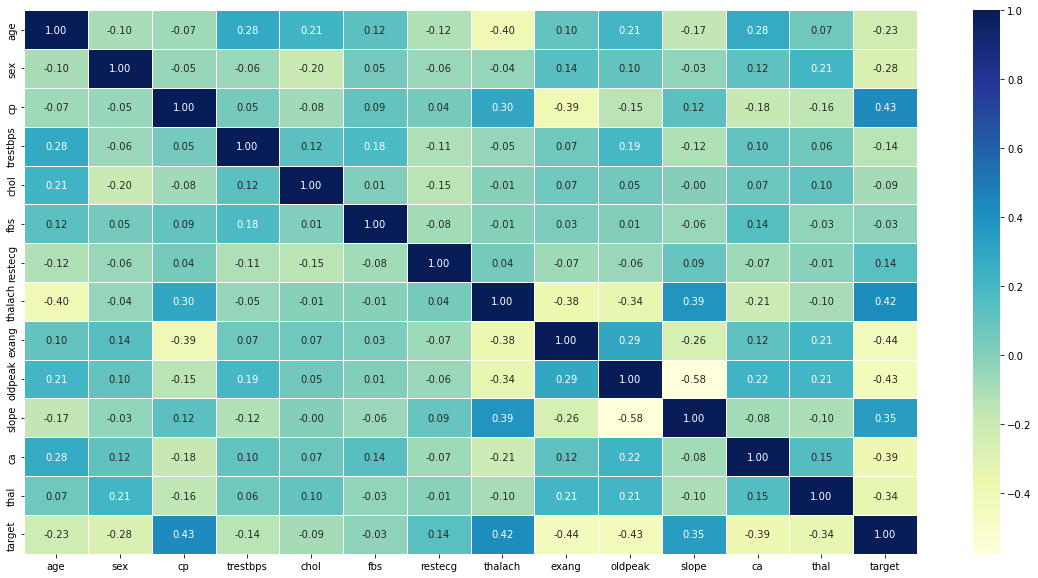

In [48]:
#Let's make our correlation matrix more prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(20,10))

ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu"
            )


## 5.Modelling

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
#Split data into  and y 
X = df.drop("target",axis=1)
y= df["target"]

In [51]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [53]:
#Split data into train and test sets
np.random.seed(42)

#Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [54]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [55]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now that we have split our data into training and test sets, it is time to build a machine learning model.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [56]:
#put models in a dictionary 
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
#Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''
    Fits and evaluates given machine learning models.
    models : A dictionary of different Schikit-learn machine learning models
    X_train:training data(no labels)
    X_test:test data (no labels)
    y_train: training labels
    y_test: test labels
    '''
    #Set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name,model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [57]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train = y_train,
                            y_test=y_test)
model_scores

D:\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

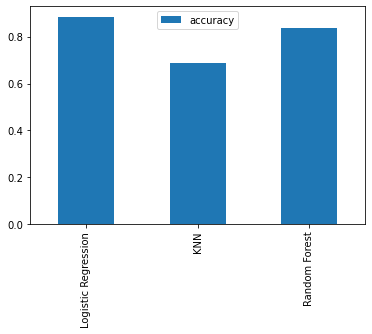

In [64]:
model_compare = pd.DataFrame(model_scores,index = ["accuracy"])
model_compare.T.plot.bar();

Now we have got our baseline model... and have known a model's first predictions aren't always what we should based our next steps off. These our the next steps we should do:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1-score
* Classification report 
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (By Hand) 

In [69]:
#Let's tune KNN
train_scores = []
test_scores = []

#Create a list of different values of n_neighbours 
neighbors = range(1,21)

#Setup KNN instance 
knn = KNeighborsClassifier()

#loop through different n-neighbours 
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [70]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [71]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


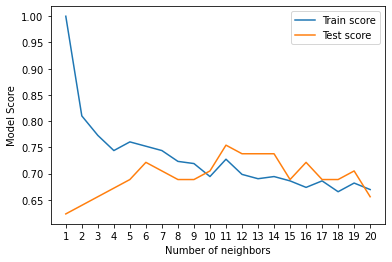

In [72]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune: 
* LogisticRegression()
* RandomForestClassifier() 

...using RandomizedSearchCV

In [73]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier 
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

Now we have got hyperparameter grids setup for each of our models,
let's tune them using RandomizedSearchCV..

In [75]:
#Tune LogisticRegression
np.random.seed(42)

#Setup random hyperparameters search for logisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose = True)

#Fit hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [77]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now that we have tuned in hyperparameters for LogisticRegression(), let's do the same for RandomForestClassifier()

In [78]:
#Tune RandomForestClassifier
np.random.seed(42)

#Setup random hyperparameters search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose = True)

#Fit hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [79]:
#Find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [80]:
#Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

In [81]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model performed the best out of the three so far, we try and improve it using GridSearchCV

In [84]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [85]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [86]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix 
* Classification report 
* Precision 
* Recall 
* F1-score

... and it would be great if cross validation was used where possible 

To make comparisions and evaluate our trained model, we need to make predictions

In [87]:
#Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [88]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

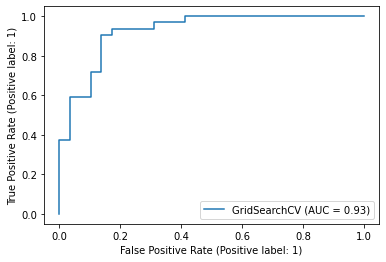

In [90]:
#Plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test);

In [92]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

array([[25,  4],
       [ 3, 29]], dtype=int64)

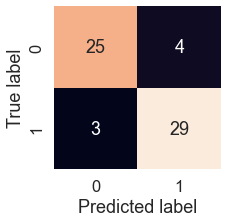

In [94]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    '''
    Plots a nice looking confusion matrix using seaborn's heatmap()
    '''
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test,y_preds)

Now that we have got a ROC curve, AUC metric and a confusion matrix, let's get a classification report as well as cross validated precison, recall and f1-score

In [95]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross validation

We are going to calculate accuracy,precision,recall,f1-score of our model using cross-validation and to do so we will be using 
`cross_val_score()`

In [96]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [97]:
#Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver="liblinear" )

In [98]:
#Cross validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [100]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [101]:
#Cross validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring = "precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [102]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [103]:
#Cross validated Recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring = "recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [104]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [105]:
#Cross validated f1-score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring = "f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [107]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

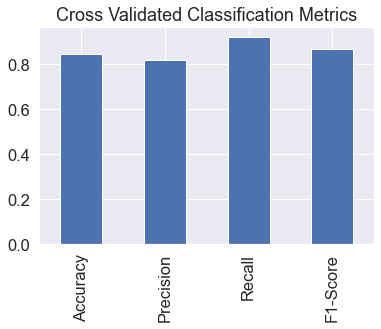

In [109]:
#Visualize cross validated metrics 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1-Score":cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title = "Cross Validated Classification Metrics",
                     legend = False);

## Feature Importance 
Feature importance is other way of asking, "which features contributed most to the outcome of our model and how did they contribute?"

Finding feature importance is different for each machine learning model

Let's find feature importance for our LogisticRegression model...

In [110]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [114]:
#Fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
clf.fit(X_train,y_train);

In [115]:
#Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [117]:
#Make coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

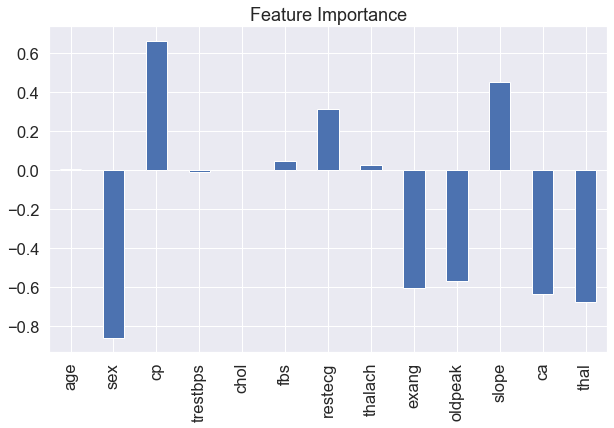

In [123]:
#Visualise Feature Importance
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = "Feature Importance",legend = False,figsize=(10,6));

## 6. Experimentation
It turns out that we were experimenting throughout the project. Now whether to continue experimenting or not depends on the below questions:
* Could you collect more data?
* Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.
* Could you improve the current models (beyond what we've done so far)?
* If your model is good enough, how would you export it and share it with others? 